In [1]:
using Pkg 
pkg"instantiate" # makes sure all relevant packages are installed

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`


In [2]:
using Parameters, Distributions, LinearAlgebra, Plots

# load auxiliary code 
include("population.jl")

# utility function
function u(type, x)
    @unpack M, H, S, A = type 
    return x * M + x^2 * 0.5 * H + 0.5 * x * (2 - x) * S^2 * A
end

# cost function
c(type, x) = x * type.M + x^2 * type.H

c (generic function with 1 method)

In [3]:
function genDist(;
                    aDistribution = LogNormal(), 
                    hDistribution = LogNormal(2),
                    mDistribution = LogNormal(), 
                    sDistribution = LogNormal(3))
    return () -> (M = rand(mDistribution), S = rand(sDistribution), A = rand(aDistribution), H = rand(hDistribution))
end

genDist (generic function with 1 method)

In [4]:
function myLogNormal(a, b)
    mu = log(a) - b/2 # (mean of underlying)
    sigma = sqrt(b) # (std of underlying)
    return LogNormal(mu, sigma)
end

myLogNormal (generic function with 1 method)

In [5]:
contracts = 0.:0.04:1.
meanS = sqrt(25000^2 - 5100^2);
testDist = genDist(aDistribution = myLogNormal(1*10^(-5), 0.25),
                    hDistribution = myLogNormal(1330, 0.28),
                    mDistribution = myLogNormal(4340, 0.20),
                    sDistribution = myLogNormal(meanS, 0.25));

testPop = population(testDist, 100, contracts, u, c);
testEq = equilibrium(testPop, tolerance = 10);

Iteration Budget:100%|██████████████████████████████████| Time: 0:00:30
  iter:   100000
  error:  6783.336328472775


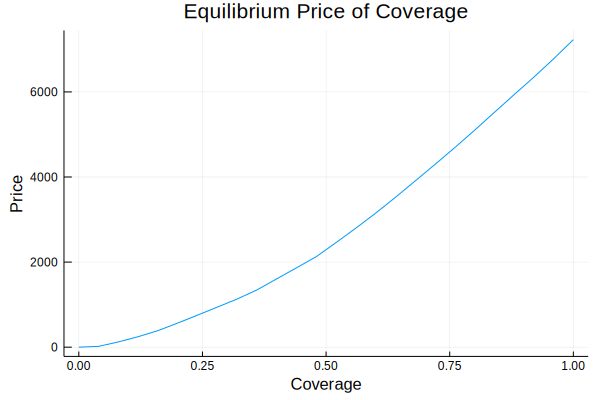

In [6]:
plot(contracts, testEq.p, legend = false, xlabel = "Coverage", ylabel = "Price", title = "Equilibrium Price of Coverage")